In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from keras.applications import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from keras.models import Model

# Step 1: Loading Labels

label_file_path = "/content/drive/MyDrive/Oil_GVF_prediction_CNN_models/gas_label.csv"
labels_df = pd.read_csv(label_file_path)

# Step 2: Feature Extraction

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Remove the last layer of ResNet50 and use the output of the second last layer as features
model = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)

# Define a function to extract features from images
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()


In [6]:
# Step 3: Data Labeling

# Merge labels with image paths
data = []
for index, row in labels_df.iterrows():
    experiment_name = row['Experiment Number']
    bg_flow = row['Background Flow (m3/h)']
    GVF = row['GVF(%)']
    folder_path = os.path.join("/content/drive/MyDrive/Oil_GVF_prediction_CNN_models/oil_gas_40_loci_data", experiment_name)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        features = extract_features(img_path)
        data.append([experiment_name, bg_flow, GVF, img_path] + features.tolist())


1/1 [==============================] - 0s 199ms/step


In [7]:
# Create DataFrame
columns = ['Experiment Number', 'Background Flow', 'GVF', 'Image Path'] + [f'feature_{i}' for i in range(100352)]
df = pd.DataFrame(data, columns=columns)

In [8]:
df.head()

,Experiment Number,Background Flow,GVF,Image Path,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_100342,feature_100343,feature_100344,feature_100345,feature_100346,feature_100347,feature_100348,feature_100349,feature_100350,feature_100351
0,be22003_028,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.318595,-2.808947,-0.146896,-1.075469,-1.248283,-0.806105,...,-0.279955,-4.563979,-3.273430,-1.308669,0.607414,-2.893286,-0.302013,-0.838324,2.277556,4.765643
1,be22003_028,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.129699,-2.303152,-1.113735,-0.679054,-1.650889,-1.485284,...,1.259941,-4.397469,-3.912649,-1.125167,2.199435,-3.242804,-0.692663,-0.974488,1.530404,7.204950
2,be22003_028,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.771093,-2.886706,-0.158310,0.295893,-2.209199,-0.489188,...,-1.642339,-4.472505,-3.813935,-1.366062,1.280857,-3.254001,-0.140181,-0.935827,0.157466,4.173981
3,be22003_028,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.400945,-2.760838,-0.634649,-1.847747,-2.176139,-1.681095,...,0.516535,-4.034519,-3.113899,-1.900899,1.285366,-3.085946,-0.325032,-0.202416,2.134686,5.226145
4,be22003_028,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.952821,-3.050181,-0.763546,-0.697084,-1.634657,-2.288538,...,1.337775,-4.609097,-3.097044,-1.289115,1.963329,-3.843309,-0.582755,-0.827000,1.287021,6.553019


In [9]:
df

,Experiment Number,Background Flow,GVF,Image Path,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_100342,feature_100343,feature_100344,feature_100345,feature_100346,feature_100347,feature_100348,feature_100349,feature_100350,feature_100351
0,be22003_028,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.318595,-2.808947,-0.146896,-1.075469,-1.248283,-0.806105,...,-0.279955,-4.563979,-3.273430,-1.308669,0.607414,-2.893286,-0.302013,-0.838324,2.277556,4.765643
1,be22003_028,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.129699,-2.303152,-1.113735,-0.679054,-1.650889,-1.485284,...,1.259941,-4.397469,-3.912649,-1.125167,2.199435,-3.242804,-0.692663,-0.974488,1.530404,7.204950
2,be22003_028,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.771093,-2.886706,-0.158310,0.295893,-2.209199,-0.489188,...,-1.642339,-4.472505,-3.813935,-1.366062,1.280857,-3.254001,-0.140181,-0.935827,0.157466,4.173981
3,be22003_028,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.400945,-2.760838,-0.634649,-1.847747,-2.176139,-1.681095,...,0.516535,-4.034519,-3.113899,-1.900899,1.285366,-3.085946,-0.325032,-0.202416,2.134686,5.226145
4,be22003_028,5,0,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.952821,-3.050181,-0.763546,-0.697084,-1.634657,-2.288538,...,1.337775,-4.609097,-3.097044,-1.289115,1.963329,-3.843309,-0.582755,-0.827000,1.287021,6.553019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,be22004_018,30,63,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.687931,-1.468773,-1.398699,-1.303798,-1.977592,-1.792567,...,7.360955,-2.705888,-2.167799,-2.451150,-2.503945,-1.758758,-2.056801,0.631029,-1.010166,-1.066958
90,be22004_018,30,63,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.700710,-2.128342,-1.785743,-0.334675,-1.878498,-0.925970,...,2.672436,-2.598007,-3.167420,-2.485960,-2.844242,-1.999940,-1.700615,0.430485,0.712193,0.875304
91,be22004_018,30,63,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-1.438518,-1.849249,-1.728659,-0.687143,-1.701396,-1.157918,...,3.196662,-2.510602,-2.550005,-1.991064,-2.675609,-2.138726,-2.386223,-1.348065,1.322245,-1.587296
92,be22004_018,30,63,/content/drive/MyDrive/Oil_GVF_prediction_CNN_...,-0.847109,-1.680849,-1.336006,0.009732,-1.638400,-1.015930,...,5.052307,-2.409827,-2.043064,-1.933363,-2.421756,-2.173115,-2.084565,-1.088102,-0.302781,-2.151657


In [10]:
y_bg_flow = df['Background Flow']  # Background Flow
y_WaterCut = df['GVF']  # GVF

In [11]:
# Split features and target variables
X = df.drop(columns=["Experiment Number", 'Background Flow', 'GVF', 'Image Path'])  # Excluding target variables only
y = df[['Background Flow', 'GVF']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train a regression model (example: RandomForestRegressor)
reg_model = RandomForestRegressor()
reg_model.fit(X_train, y_train)

# Predictions for test set
predictions = reg_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [13]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 9.852894736842103
Mean Squared Error (MSE): 149.62899736842104
R-squared (R2) Score: 0.501116706018664


In [14]:
predictions

array([[11.75, 36.76],
       [12.5 , 16.22],
       [23.5 , 11.41],
       [21.75, 17.06],
       [13.75, 11.6 ],
       [15.  , 35.58],
       [12.25, 33.08],
       [23.  ,  8.67],
       [14.75,  9.5 ],
       [17.25, 21.43],
       [20.25, 40.01],
       [16.75, 39.9 ],
       [23.5 , 46.7 ],
       [18.75, 10.31],
       [16.5 ,  8.09],
       [17.  ,  7.13],
       [13.5 , 16.65],
       [13.75, 36.58],
       [23.25, 12.2 ]])

In [15]:
import math
# Function to predict Background Flow and GVF for a single image
def predict_values_for_image(img_path):
    # Extract features from the image
    features = extract_features(img_path)

    # Reshape the features to match the input shape expected by the model
    features = features.reshape(1, -1)

    # Predict Background Flow and WaterCut values
    flow_rate_prediction = reg_model.predict(features)

    return flow_rate_prediction[0][0], flow_rate_prediction[0][1]

In [18]:
# Example usage
new_image_path = "/content/drive/MyDrive/Oil_GVF_prediction_CNN_models/oil_gas_40_loci_data/be22004_004/16_02_2022_09_40_23_00_hdf5.png"
bg_flow_pred, GVF_pred = predict_values_for_image(new_image_path)

print("Predicted Background Flow:", math.ceil(bg_flow_pred))
print("Predicted GVF:", math.ceil(GVF_pred))


1/1 [==============================] - 0s 196ms/step
Predicted Background Flow: 8
Predicted GVF: 52


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


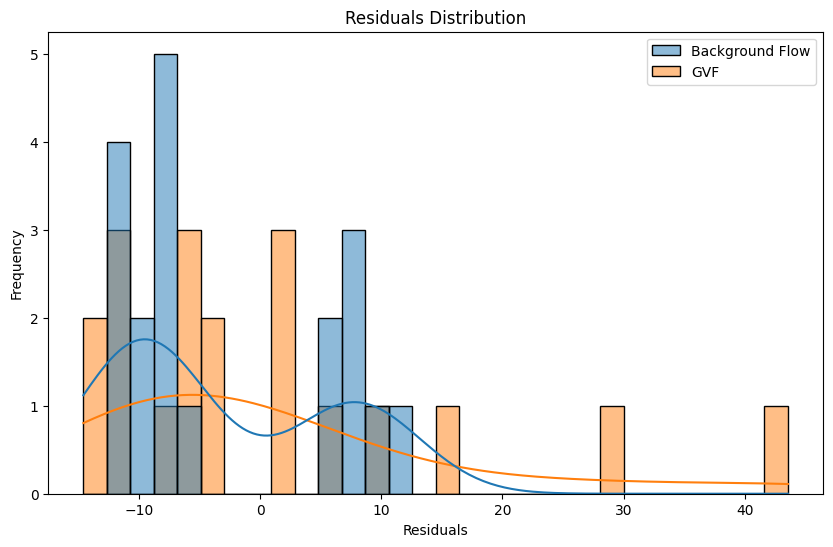

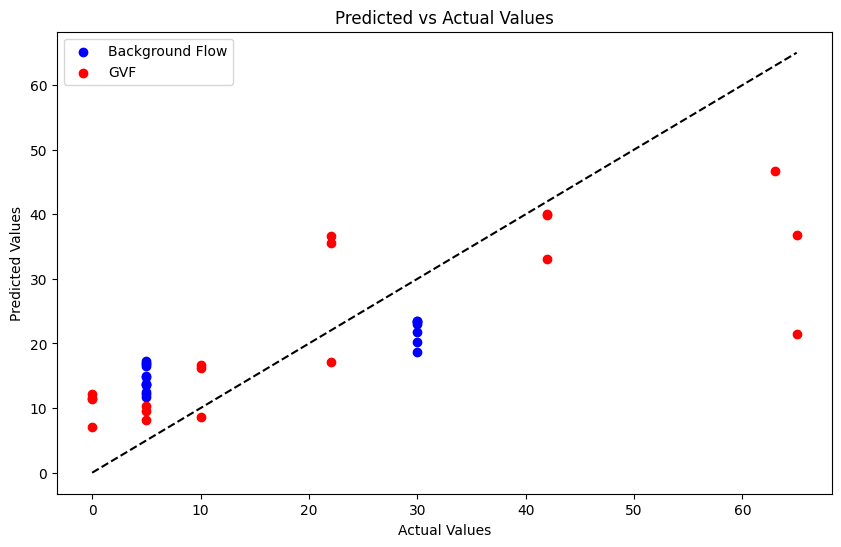

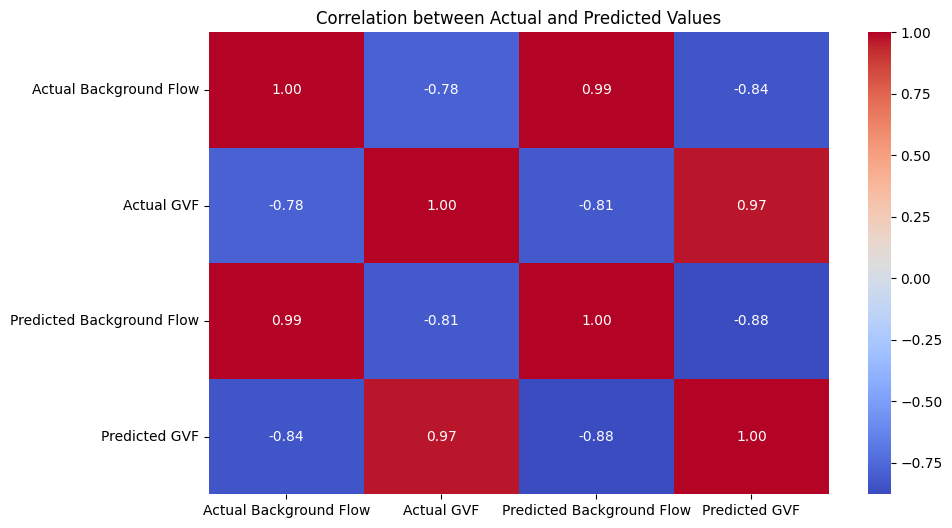

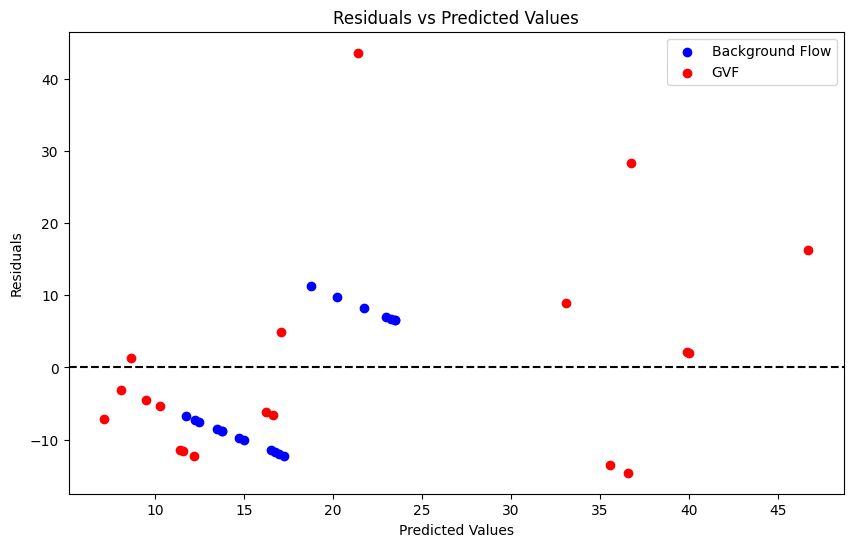

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the residuals
residuals = y_test - predictions

# Plotting residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test['Background Flow'], predictions[:, 0], color='blue', label='Background Flow')
plt.scatter(y_test['GVF'], predictions[:, 1], color='red', label='GVF')
plt.plot([0, max(max(y_test['Background Flow']), max(y_test['GVF']))], [0, max(max(y_test['Background Flow']), max(y_test['GVF']))], color='black', linestyle='--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()



plt.figure(figsize=(10, 6))

# Add a small value to the diagonal of the covariance matrix
epsilon = 1e-9
cov_matrix = np.cov(np.concatenate((y_test, predictions), axis=1), rowvar=False)
# Compute the correlation matrix
corr_matrix = np.corrcoef(cov_matrix)

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=['Actual Background Flow', 'Actual GVF', 'Predicted Background Flow', 'Predicted GVF'],
            yticklabels=['Actual Background Flow', 'Actual GVF', 'Predicted Background Flow', 'Predicted GVF'])
plt.title('Correlation between Actual and Predicted Values')
plt.show()

# Scatter plot of residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(predictions[:, 0], residuals['Background Flow'], color='blue', label='Background Flow')
plt.scatter(predictions[:, 1], residuals['GVF'], color='red', label='GVF')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [20]:
background_flow_actual = y_test['Background Flow'].to_numpy()
GVF_actual = y_test['GVF'].to_numpy()
background_flow_predicted = predictions[:, 0]
GVF_predicted = predictions[:, 1]

data_ = {
    'Background Flow (Actual)': background_flow_actual,
    'Background Flow (Predicted)': background_flow_predicted,
    'GVF (Actual)': GVF_actual,
    'GVF (Predicted)': GVF_predicted
}

df_ = pd.DataFrame(data_)
pd.set_option('display.float_format', '{:.2f}'.format)  # Set decimal places to 2
print(df_.to_string(index=False))

 Background Flow (Actual)  Background Flow (Predicted)  GVF (Actual)  GVF (Predicted)
                        5                        11.75            65            36.76
                        5                        12.50            10            16.22
                       30                        23.50             0            11.41
                       30                        21.75            22            17.06
                        5                        13.75             0            11.60
                        5                        15.00            22            35.58
                        5                        12.25            42            33.08
                       30                        23.00            10             8.67
                        5                        14.75             5             9.50
                        5                        17.25            65            21.43
                       30                        20.25

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
def train_and_evaluate_model(models, X_train, y_train, X_test, y_test):
    # Train the model
    models.fit(X_train, y_train)

    # Predictions for test set
    predictions = models.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return mae, mse, r2, predictions

In [22]:
from sklearn.multioutput import MultiOutputRegressor

# Initialize the models
gradient_boosting_model = GradientBoostingRegressor()
svr_model = SVR()
neural_network_model = MLPRegressor()

# Wrap each model with MultiOutputRegressor
multioutput_gb = MultiOutputRegressor(gradient_boosting_model)
multioutput_svr = MultiOutputRegressor(svr_model)
multioutput_nn = MultiOutputRegressor(neural_network_model)

# Train and evaluate each multi-output model
multioutput_gb.fit(X_train, y_train)
multioutput_svr.fit(X_train, y_train)
multioutput_nn.fit(X_train, y_train)

predictions_gb = multioutput_gb.predict(X_test)
predictions_svr = multioutput_svr.predict(X_test)
predictions_nn = multioutput_nn.predict(X_test)

# Evaluate the models
mae_gb = mean_absolute_error(y_test, predictions_gb)
mse_gb = mean_squared_error(y_test, predictions_gb)
r2_gb = r2_score(y_test, predictions_gb)

mae_svr = mean_absolute_error(y_test, predictions_svr)
mse_svr = mean_squared_error(y_test, predictions_svr)
r2_svr = r2_score(y_test, predictions_svr)

mae_nn = mean_absolute_error(y_test, predictions_nn)
mse_nn = mean_squared_error(y_test, predictions_nn)
r2_nn = r2_score(y_test, predictions_nn)

# Print evaluation metrics for each model
print("Gradient Boosting Regressor:")
print("MAE:", mae_gb)
print("MSE:", mse_gb)
print("R^2:", r2_gb)

print("\nSupport Vector Regressor:")
print("MAE:", mae_svr)
print("MSE:", mse_svr)
print("R^2:", r2_svr)

print("\nNeural Network Regressor:")
print("MAE:", mae_nn)
print("MSE:", mse_nn)
print("R^2:", r2_nn)


Gradient Boosting Regressor:
MAE: 8.454370416848654
MSE: 210.14427564946692
R^2: 0.2447715975109116

Support Vector Regressor:
MAE: 14.998487891126086
MSE: 434.6106322935446
R^2: -0.7576752952406816

Neural Network Regressor:
MAE: 49.5313173714639
MSE: 3522.524804978508
R^2: -20.665490198331486


In [23]:
# Create a function to predict on a single image
def predict_on_single_image(image_path):
    # Extract features from the image
    features = extract_features(image_path)

    # Reshape features to match expected input shape
    features = np.array(features).reshape(1, -1)

    # Predict using the multi-output regressor models
    predictions_gb = multioutput_gb.predict(features)
    predictions_svr = multioutput_svr.predict(features)
    predictions_nn = multioutput_nn.predict(features)

    return predictions_gb, predictions_svr, predictions_nn

# Provide the path to the single image you want to predict
single_image_path = "/content/drive/MyDrive/Oil_GVF_prediction_CNN_models/oil_gas_40_loci_data/be22004_004/16_02_2022_09_40_23_00_hdf5.png"

# Predict on the single image
predictions_gb, predictions_svr, predictions_nn = predict_on_single_image(single_image_path)

# Print the predictions
print("Predictions for the single image:")
print("Gradient Boosting Regressor Prediction:", predictions_gb)
print("Support Vector Regressor Prediction:", predictions_svr)
print("Neural Network Regressor Prediction:", predictions_nn)


1/1 [==============================] - 0s 285ms/step
Predictions for the single image:
Gradient Boosting Regressor Prediction: [[ 5.0003453  64.99812656]]
Support Vector Regressor Prediction: [[28.81477759  9.77083501]]
Neural Network Regressor Prediction: [[-68.63379486  -0.1301793 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ML